Here, I'll prepare the splits from the CORE dataset with the X-GENRE labels.

In [2]:
import pandas as pd
import numpy as np

We will perform single-label experiments, so we will discard all instances with more than one category. We will also discard:
- instances with labels that were "discarded" from the X-GENRE schema
- instances with no CORE subcategory (-> were not mapped to X-GENRE schema)

As this data will be merged with CORE and GINCO data into a joined dataset, I will use only 1000 instances so that the dataset is balanced in regards to the originating datasets. This means that I will split the dataset into splits of 1000 texts, stratified based on the X-GENRE labels. Then I will experiment with:

1) Training a classifier of only 1000 texts.

2) Training a classifier of 3000 texts.

3) Training a classifier of 5000 texts.

In [3]:
# Import the sheet with all information
dataset_df = pd.read_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-sheets-with-all-info/CORE-all-information.csv", sep= "\t", index_col = 0)

dataset_df

,label,text,split,main_labels,sublabels,Len,main_len,sub_len,GINCORE,full_names,main_labels_full_names,FTD_pred,GINCO_downcast_pred,MT-GINCO_downcast_pred,subcategories_to_X-GENRE
0,NA OP SR OB,The Top TEN 'Whiniest Sets of Fans' in English...,train,NA OP,SR OB,4,2,2,NA OP SR OB,SR OB,NA OP,NaN,NaN,NaN,check
1,NA NE,"Ferry consultation needs deeper questions, say...",train,NaN,NE,2,1,1,News,News Report/Blog,Narrative,NaN,NaN,NaN,News
2,ID DF,I'v been recording and mixing music for about ...,train,ID,DF,2,1,1,Forum,Discussion Forum,Interactive Discussion,NaN,NaN,NaN,Forum
3,NA SR,The 25-year-old did have chances at Anfield. B...,train,NaN,SR,2,1,1,News,Sports Report,Narrative,NaN,NaN,NaN,News
4,NA IN HA,Elizabethan Science and Technology Elizabethan...,train,NA IN,HA,3,2,1,NA IN HA,Historical Article,NA IN,NaN,NaN,NaN,discarded
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48444,NA NE,Lollapalooza heading to the Middle East in 201...,dev,NaN,NE,2,1,1,News,News Report/Blog,Narrative,NaN,NaN,NaN,News
48445,OP AV,How to: Improve Brand Engagement on Twitter Ea...,dev,OP,AV,2,1,1,Opinion/Argumentation,Advice,Opinion,NaN,NaN,NaN,discarded
48446,OP OB,The Last Post. A shameful reflection on Canada...,dev,OP,OB,2,1,1,Opinion/Argumentation,Opinion Blog,Opinion,A1 (argumentative),NaN,NaN,Opinion/Argumentation
48447,NA NE,Related Stories Students at a Sherwood Park hi...,dev,NaN,NE,2,1,1,News,News Report/Blog,Narrative,NaN,NaN,NaN,News


In [4]:
# Discard texts with a "discarded" label
dataset_df = dataset_df[dataset_df["subcategories_to_X-GENRE"] != "discarded"]

# Discard texts that have a "check" instead of a X-GENRE category - texts with no or multiple CORE subcategories

dataset_df = dataset_df[dataset_df["subcategories_to_X-GENRE"] != "check"]

dataset_df.describe()

,Len,main_len,sub_len
count,28655.000000,28655.000000,28655.0
mean,2.059536,1.059536,1.0
std,0.236629,0.236629,0.0
min,2.000000,1.000000,1.0
25%,2.000000,1.000000,1.0
50%,2.000000,1.000000,1.0
75%,2.000000,1.000000,1.0
max,3.000000,2.000000,1.0


In [5]:
print(dataset_df["subcategories_to_X-GENRE"].value_counts().to_markdown())

|                         |   subcategories_to_X-GENRE |
|:------------------------|---------------------------:|
| News                    |                      13323 |
| Opinion/Argumentation   |                       8979 |
| Forum                   |                       1950 |
| Instruction             |                       1528 |
| Information/Explanation |                       1344 |
| Prose/Lyrical           |                        842 |
| Other                   |                        490 |
| Legal                   |                        186 |
| Promotion               |                         13 |


In [6]:
# Prepare the dataset for training
final_df = pd.DataFrame({"text": dataset_df["text"], "labels": dataset_df["subcategories_to_X-GENRE"]})
final_df

,text,labels
1,"Ferry consultation needs deeper questions, say...",News
2,I'v been recording and mixing music for about ...,Forum
3,The 25-year-old did have chances at Anfield. B...,News
5,The value of NYC housing construction starts m...,News
6,"If this is your first visit, be sure to check ...",Forum
...,...,...
48440,One for the near future? Serge Gnabry At the s...,News
48441,Search smh: Search in: Stoner has earned the r...,News
48444,Lollapalooza heading to the Middle East in 201...,News
48446,The Last Post. A shameful reflection on Canada...,Opinion/Argumentation


In [7]:
# Discard 80% of News instances to make the dataset smaller and more balanced before the stratified split
final_df = final_df.drop(final_df[final_df['labels'] == 'News'].sample(n=11000, random_state=1).index)

final_df

,text,labels
1,"Ferry consultation needs deeper questions, say...",News
2,I'v been recording and mixing music for about ...,Forum
5,The value of NYC housing construction starts m...,News
6,"If this is your first visit, be sure to check ...",Forum
7,Search Have you guys been keeping up with the ...,Opinion/Argumentation
...,...,...
48429,Total coal-related jobs There are approximatel...,Information/Explanation
48433,Carrot Cake With Easter just around the corner...,Instruction
48436,Peanut allergies more common in kids from weal...,News
48444,Lollapalooza heading to the Middle East in 201...,News


In [8]:
# Discard 6900 instances of Opinion to make the dataset smaller and more balanced before the stratified split
final_df = final_df.drop(final_df[final_df['labels'] == 'Opinion/Argumentation'].sample(n=6900, random_state=1).index)

final_df

,text,labels
1,"Ferry consultation needs deeper questions, say...",News
2,I'v been recording and mixing music for about ...,Forum
5,The value of NYC housing construction starts m...,News
6,"If this is your first visit, be sure to check ...",Forum
7,Search Have you guys been keeping up with the ...,Opinion/Argumentation
...,...,...
48425,Title: The use of percentiles and percentile r...,Information/Explanation
48429,Total coal-related jobs There are approximatel...,Information/Explanation
48433,Carrot Cake With Easter just around the corner...,Instruction
48436,Peanut allergies more common in kids from weal...,News


In [9]:
final_df.labels.value_counts()

News                       2323
Opinion/Argumentation      2079
Forum                      1950
Instruction                1528
Information/Explanation    1344
Prose/Lyrical               842
Other                       490
Legal                       186
Promotion                    13
Name: labels, dtype: int64

In [10]:
final_df.labels.value_counts(normalize= "True")

News                       0.215993
Opinion/Argumentation      0.193305
Forum                      0.181311
Instruction                0.142073
Information/Explanation    0.124965
Prose/Lyrical              0.078289
Other                      0.045560
Legal                      0.017294
Promotion                  0.001209
Name: labels, dtype: float64

In [11]:
# Analyze distribution of labels according to the new mapping
count = pd.DataFrame({"Count": list(final_df["labels"].value_counts()), "Percentage": list(final_df["labels"].value_counts(normalize=True)*100)}, index = final_df["labels"].value_counts().index)

print(count.to_markdown())

|                         |   Count |   Percentage |
|:------------------------|--------:|-------------:|
| News                    |    2323 |    21.5993   |
| Opinion/Argumentation   |    2079 |    19.3305   |
| Forum                   |    1950 |    18.1311   |
| Instruction             |    1528 |    14.2073   |
| Information/Explanation |    1344 |    12.4965   |
| Prose/Lyrical           |     842 |     7.82892  |
| Other                   |     490 |     4.55602  |
| Legal                   |     186 |     1.72943  |
| Promotion               |      13 |     0.120874 |


In [12]:
# Extract Promotion
promotion_df = final_df[final_df["labels"] == "Promotion"]

promotion_df

,text,labels
2312,Win yourself a FREE copy of the BradyGames off...,Promotion
5840,"Director of the fight against Napoleon , frien...",Promotion
13044,Not yet rated Hotel Alte City is cosy hotel de...,Promotion
13874,Why join us? Because it will be awesome! #NYCT...,Promotion
17976,Post navigation Citizen Fish are back on the r...,Promotion
18123,Do You Want To Know The Quick Secret for On Pa...,Promotion
27173,"Pages Friday, October 31, 2008 This is not to ...",Promotion
33791,Any profitable Internet marketer will tell you...,Promotion
40293,About Senior FriendFinder Senior FriendFinder ...,Promotion
42167,Post navigation Could Inbox Zero be the key to...,Promotion


In [14]:
# Dataset without promotion
remaining_df = final_df[final_df["labels"] != "Promotion"]

remaining_df.shape

(10742, 2)

In [15]:
# Split the dataset (stratified split according to the label) so that we will have only 1000 instances
from sklearn.model_selection import train_test_split
rest, sample = train_test_split(remaining_df, test_size=1000, random_state=42, shuffle = True, stratify = remaining_df.labels)

sample

,text,labels
28092,Another option is to buy a complete new v2 Sup...,Forum
6037,Game Review Sports Champions 2 Review The orig...,Opinion/Argumentation
11006,Animal Collective is an art-pop band from Balt...,Other
33319,"Tuesday, August 14, 2012 The middle of the sto...",Opinion/Argumentation
46776,"As Megan Stammers, 15, is found -- we ask is t...",News
...,...,...
35903,Things to do after Mass Brothers and sisters -...,Forum
33897,"You have to be kidding.... Okay, agreed. There...",Opinion/Argumentation
41678,Go back to Windows 7 or XP operating system If...,Forum
45867,The long haul I've been having the longest bou...,Opinion/Argumentation


In [17]:
sample.labels.value_counts()

News                       216
Opinion/Argumentation      194
Forum                      182
Instruction                142
Information/Explanation    125
Prose/Lyrical               78
Other                       46
Legal                       17
Name: labels, dtype: int64

In [20]:
# Add Promotion to the sample
final_sample = pd.concat([sample, promotion_df])

final_sample.head()

,text,labels
28092,Another option is to buy a complete new v2 Sup...,Forum
6037,Game Review Sports Champions 2 Review The orig...,Opinion/Argumentation
11006,Animal Collective is an art-pop band from Balt...,Other
33319,"Tuesday, August 14, 2012 The middle of the sto...",Opinion/Argumentation
46776,"As Megan Stammers, 15, is found -- we ask is t...",News


In [21]:
final_sample.tail()

,text,labels
40293,About Senior FriendFinder Senior FriendFinder ...,Promotion
42167,Post navigation Could Inbox Zero be the key to...,Promotion
44559,What is a good credit score? This is a popular...,Promotion
45174,About The Axis of Awesome are The World's Most...,Promotion
46954,The Right Side Of The Bed with Forrister Jenot...,Promotion


In [23]:
# Analyze distribution of labels according to the new mapping
count = pd.DataFrame({"Count": list(final_sample["labels"].value_counts()), "Percentage": list(final_sample["labels"].value_counts(normalize=True)*100)}, index = final_sample["labels"].value_counts().index)

print(count.to_markdown())

|                         |   Count |   Percentage |
|:------------------------|--------:|-------------:|
| News                    |     216 |     21.3228  |
| Opinion/Argumentation   |     194 |     19.151   |
| Forum                   |     182 |     17.9664  |
| Instruction             |     142 |     14.0178  |
| Information/Explanation |     125 |     12.3396  |
| Prose/Lyrical           |      78 |      7.6999  |
| Other                   |      46 |      4.54097 |
| Legal                   |      17 |      1.67818 |
| Promotion               |      13 |      1.28332 |


In [24]:
# Create a stratified split
train, devtest = train_test_split(final_sample, test_size=0.4, random_state=42, shuffle = True, stratify = final_sample.labels)
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

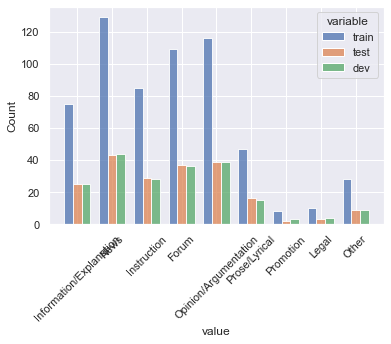

In [25]:
# Observe the distribution of the labels in all sets.
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=45)

In [26]:
df.describe()

,train,test,dev
count,607,203,203
unique,9,9,9
top,News,News,News
freq,129,43,44


In [30]:
print(list(train.labels.unique()))

['Other', 'Information/Explanation', 'News', 'Instruction', 'Opinion/Argumentation', 'Forum', 'Prose/Lyrical', 'Legal', 'Promotion']


In [32]:
# Save the new files as CSV
train.to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/CORE-sample-X-GENRE-train.csv")
test.to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/CORE-sample-X-GENRE-test.csv")
dev.to_csv("C:/Users/tajak/Google Drive/GitHub/Genre-Datasets-Comparison/data-splits/CORE-sample-X-GENRE-dev.csv")